In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
import numpy as np
import pandas as pd

In [3]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        # how many layers
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

        # input layer (4 features) --> h1 --> h2 --> output (3 classes)

    def forward(self, x):
        # is defining the activations functions for the layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [4]:
torch.manual_seed(32)
model = Model()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('../../PYTORCH_NOTEBOOKS/PYTORCH_NOTEBOOKS/Data/iris.csv')

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


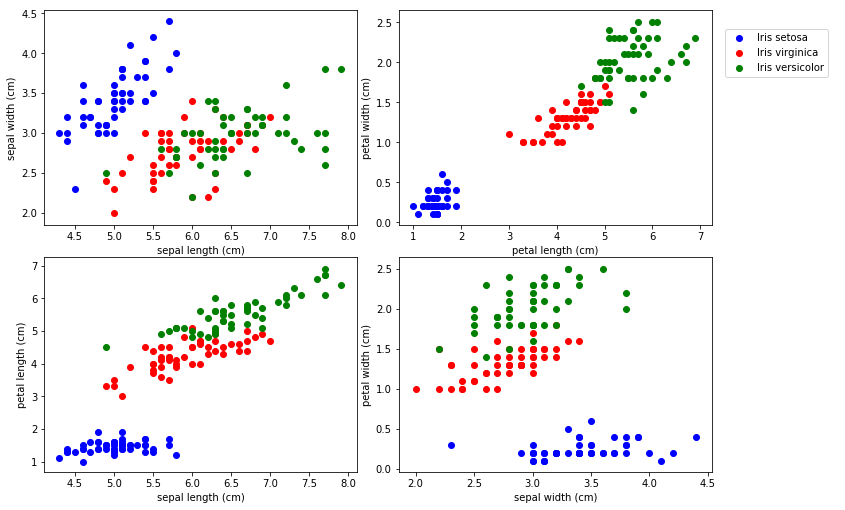

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [9]:
X = df.drop('target', axis=1)
y = df['target']

X = X.values
y = y.values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [12]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [13]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [14]:
# Coss function for measuring the error rate
criterion = nn.CrossEntropyLoss()
# optimizer for the model
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [15]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [16]:
# Epochs ?
epochs = 100
losses = []

for i in range(epochs):
    # forward and get a prediction
    y_pred = model.forward(X_train)

    # calculate the loss
    loss = criterion(y_pred, y_train)
    losses.append(loss)

    if i%10==0:
        print(f"epoch {i} and loss is: {loss}")

    # backpropagation

    # reset the gradients
    optimizer.zero_grad()
    # compute the gradient
    loss.backward()
    optimizer.step()

epoch 0 and loss is: 1.1507115364074707
epoch 10 and loss is: 0.9377316832542419
epoch 20 and loss is: 0.7798274159431458
epoch 30 and loss is: 0.6099672317504883
epoch 40 and loss is: 0.4008353650569916
epoch 50 and loss is: 0.25436991453170776
epoch 60 and loss is: 0.15052446722984314
epoch 70 and loss is: 0.10086154192686081
epoch 80 and loss is: 0.08127661049365997
epoch 90 and loss is: 0.07230935245752335


Text(0.5, 0, 'Epoch')

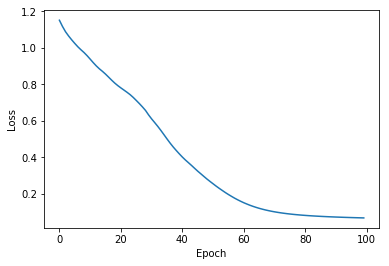

In [17]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [18]:
# doesn't take care the grad
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [19]:
# if here we get a big loss we are overfitting
loss

tensor(0.0581)

In [20]:
correct = 0

with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        print(f"{i+1}). {str(y_val)} {y_test[i]}")
        # here each one is the correct value for the three classes

        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f'We got {correct} correct and an accuracy of {int(correct/len(y_test)*100)} %')

1). tensor([-2.1245,  4.8073, -0.8623]) 1
2). tensor([-1.7976,  5.3110, -1.5445]) 1
3). tensor([  6.3540,   0.8432, -10.0531]) 0
4). tensor([-3.9114,  4.5969,  1.1698]) 1
5). tensor([-7.4707,  3.2028,  5.7865]) 2
6). tensor([-10.4965,   1.6465,   9.6306]) 2
7). tensor([  6.3199,   0.9912, -10.1520]) 0
8). tensor([  7.0467,   0.7053, -10.9127]) 0
9). tensor([-7.2053,  3.3485,  5.3575]) 2
10). tensor([-9.3950,  2.5767,  8.1044]) 2
11). tensor([-9.8795,  2.3483,  8.7148]) 2
12). tensor([ 6.2747,  0.6650, -9.7604]) 0
13). tensor([-9.3131,  2.1888,  8.1954]) 2
14). tensor([-3.7796,  4.5061,  1.0759]) 1
15). tensor([-7.8646,  3.0127,  6.2310]) 2
16). tensor([-1.8859,  5.1583, -1.3341]) 1
17). tensor([-5.6999,  3.5039,  3.6704]) 2
18). tensor([  7.1788,   0.7363, -11.1340]) 0
19). tensor([-3.2937,  4.7942,  0.3480]) 1
20). tensor([-7.7657,  3.7639,  5.7106]) 2
21). tensor([  6.6498,   0.7883, -10.4241]) 0
22). tensor([  7.4356,   0.8912, -11.6589]) 0
23). tensor([-9.7573,  2.1751,  8.6661]) 2

## Save the model into a file
For saving the hole code you have to only do the save of the model


In [21]:
torch.save(model.state_dict(), 'my_iris_model.pt')

## Load the model from a file

In [22]:
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [23]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

## New data point never seen

In [24]:
mystery_iris = torch.tensor([5.6, 3.7, 2.2, 0.5])

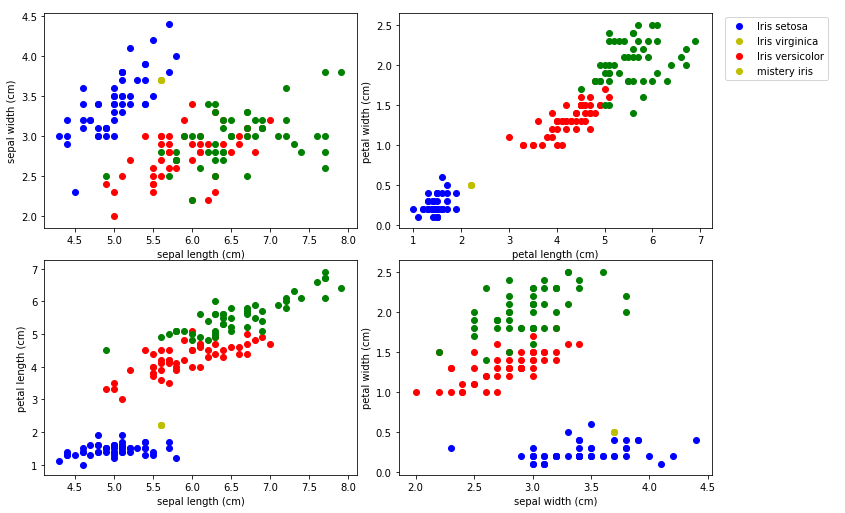

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor', 'mistery iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

        # add a point for the mystery_iris
        ax.scatter(mystery_iris[plots[i][0]], mystery_iris[plots[i][1]], color='y')
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [26]:
with torch.no_grad():
    print(model(mystery_iris))
    print(model(mystery_iris).argmax())

tensor([  5.9520,   1.5591, -10.0041])
tensor(0)
